# EDA about the NLP part


## Load data

In [26]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
out_path = "./data/out.dat"

with open(out_path, "rb") as f:
    data = pickle.load(f)

### We assume that we use the compound sentiment in nltk

In [21]:
for d in data:
    d['sentiment_headline'] = d['sentiment_headline']['compound']
    d['sentiment_abstract'] = d['sentiment_abstract']['compound']

In [22]:
data = pd.DataFrame(data)

In [23]:
data.head(5)

,pub_date,headline,abstract,source,sentiment_headline,sentiment_abstract
0,2016-09-07 15:11:56+00:00,Dell Closes $67 Billion Merger,Michael Dell officially closed his record $67 ...,nytimes,0.0000,0.0000
1,2012-04-10 15:19:22+00:00,A Contrarian Chowhound Weighs In,"Tyler Cowen skewers food-world pretensions, es...",nytimes,0.0000,0.5423
2,2011-10-20 22:21:21+00:00,Hipstamatic in Kabul,When Ben Lowy was in Afghanistan taking pictur...,nytimes,0.0000,-0.7650
3,2017-06-09 04:33:13+00:00,"SoftBank to Buy Boston Dynamics, Maker of Anim...",The Japanese technology conglomerate agreed to...,nytimes,0.2732,0.4939
4,2015-11-28 01:01:13+00:00,Road to Robotic Parking Is Littered With Fault...,"Software and hardware mishaps, including some ...",nytimes,-0.3182,-0.2960


### To lowercase

In [24]:
data['headline'] = data['headline'].apply(lambda x: x.lower())
data['abstract'] = data['abstract'].apply(lambda x: x.lower())

In [25]:
data.head(5)

,pub_date,headline,abstract,source,sentiment_headline,sentiment_abstract
0,2016-09-07 15:11:56+00:00,dell closes $67 billion merger,michael dell officially closed his record $67 ...,nytimes,0.0000,0.0000
1,2012-04-10 15:19:22+00:00,a contrarian chowhound weighs in,"tyler cowen skewers food-world pretensions, es...",nytimes,0.0000,0.5423
2,2011-10-20 22:21:21+00:00,hipstamatic in kabul,when ben lowy was in afghanistan taking pictur...,nytimes,0.0000,-0.7650
3,2017-06-09 04:33:13+00:00,"softbank to buy boston dynamics, maker of anim...",the japanese technology conglomerate agreed to...,nytimes,0.2732,0.4939
4,2015-11-28 01:01:13+00:00,road to robotic parking is littered with fault...,"software and hardware mishaps, including some ...",nytimes,-0.3182,-0.2960


### Get word counts

In [28]:
import string

from nltk.tokenize import word_tokenize

def get_tokens(text):
    tokens = word_tokenize(text)
    tokens = list(filter(lambda token: token not in string.punctuation, tokens))
    return tokens

data['headline_tokens'] = data['headline'].apply(get_tokens)
data['abstract_tokens'] = data['abstract'].apply(get_tokens)

In [29]:
data['headline_count'] = data['headline_tokens'].apply(lambda x: len(x))
data['abstract_count'] = data['abstract_tokens'].apply(lambda x: len(x))

In [30]:
data.head(5)

,pub_date,headline,abstract,source,sentiment_headline,sentiment_abstract,headline_tokens,abstract_tokens,headline_count,abstract_count
0,2016-09-07 15:11:56+00:00,dell closes $67 billion merger,michael dell officially closed his record $67 ...,nytimes,0.0000,0.0000,"[dell, closes, 67, billion, merger]","[michael, dell, officially, closed, his, recor...",5,26
1,2012-04-10 15:19:22+00:00,a contrarian chowhound weighs in,"tyler cowen skewers food-world pretensions, es...",nytimes,0.0000,0.5423,"[a, contrarian, chowhound, weighs, in]","[tyler, cowen, skewers, food-world, pretension...",5,14
2,2011-10-20 22:21:21+00:00,hipstamatic in kabul,when ben lowy was in afghanistan taking pictur...,nytimes,0.0000,-0.7650,"[hipstamatic, in, kabul]","[when, ben, lowy, was, in, afghanistan, taking...",3,40
3,2017-06-09 04:33:13+00:00,"softbank to buy boston dynamics, maker of anim...",the japanese technology conglomerate agreed to...,nytimes,0.2732,0.4939,"[softbank, to, buy, boston, dynamics, maker, o...","[the, japanese, technology, conglomerate, agre...",9,25
4,2015-11-28 01:01:13+00:00,road to robotic parking is littered with fault...,"software and hardware mishaps, including some ...",nytimes,-0.3182,-0.2960,"[road, to, robotic, parking, is, littered, wit...","[software, and, hardware, mishaps, including, ...",9,28


## Distribution of Word Counts


Text(0.5, 0.98, 'Headline Word Count')

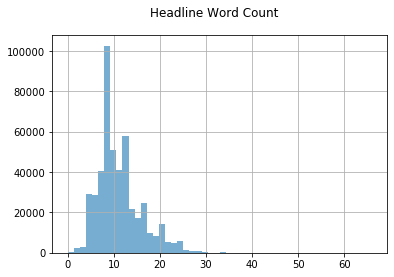

In [37]:
data['headline_count'].hist(bins=50, alpha=0.6)
plt.suptitle("Headline Word Count")

Text(0.5, 0.98, 'Abstract Word Count')

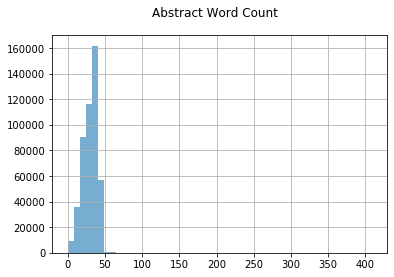

In [42]:
data['abstract_count'].hist(bins=50, alpha=0.6)
plt.suptitle("Abstract Word Count")

### Stats of Word Count

In [48]:
data['headline_count'].describe()

count    472028.000000
mean         11.095054
std           4.801111
min           0.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          66.000000
Name: headline_count, dtype: float64

In [50]:
data['abstract_count'].describe()

count    472028.000000
mean         30.167009
std           9.736939
min           0.000000
25%          24.000000
50%          31.000000
75%          38.000000
max         409.000000
Name: abstract_count, dtype: float64

## Distribution of Sentiment

### to labelize 

In [58]:
def to_label(x):
    if x == 0:
        return "neutral"
    elif x > 0:
        return "positive"
    else:
        return "negative"
    
data['sentiment_headline_label'] = data['sentiment_headline'].apply(to_label)
data['sentiment_abstract_label'] = data['sentiment_abstract'].apply(to_label)

Text(0.5, 0.98, 'Headline Sentiment')

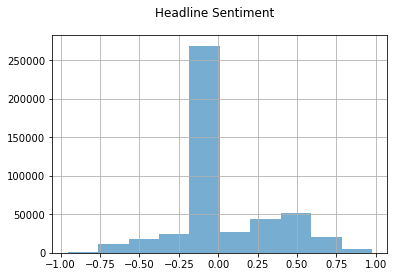

In [59]:
data['sentiment_headline'].hist(bins=10, alpha=0.6)
plt.suptitle("Headline Sentiment")

Text(0.5, 0.98, 'Abstract Sentiment')

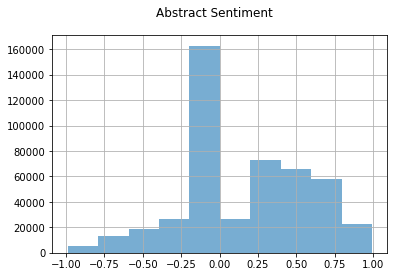

In [60]:
data['sentiment_abstract'].hist(bins=10, alpha=0.6)
plt.suptitle("Abstract Sentiment")

Text(0.5, 0.98, 'Headline Sentiment label')

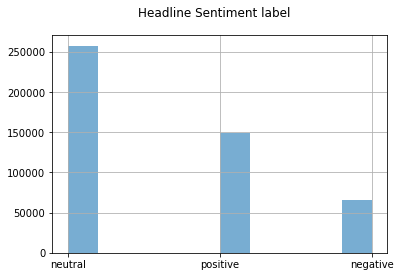

In [61]:
data['sentiment_headline_label'].hist(bins=10, alpha=0.6)
plt.suptitle("Headline Sentiment label")

Text(0.5, 0.98, 'Abstract Sentiment label')

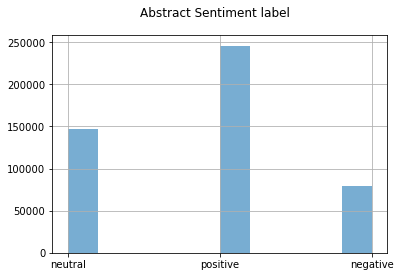

In [62]:
data['sentiment_abstract_label'].hist(bins=10, alpha=0.6)
plt.suptitle("Abstract Sentiment label")

### Stats of Sentiment

In [57]:
data['sentiment_headline'].describe()

count    472028.000000
mean          0.075321
std           0.289210
min          -0.954900
25%           0.000000
50%           0.000000
75%           0.250000
max           0.975800
Name: sentiment_headline, dtype: float64

In [56]:
data['sentiment_abstract'].describe()

count    472028.000000
mean          0.178978
std           0.383608
min          -0.989700
25%           0.000000
50%           0.102700
75%           0.475400
max           0.993800
Name: sentiment_abstract, dtype: float64

## Word Cloud

### Prepare tokens

In [128]:
from wordcloud import WordCloud, ImageColorGenerator
from pandas.core.common import flatten
from PIL import Image
import nltk

In [129]:
def get_pos(text):
    return nltk.pos_tag(text)

data['headline_pos'] = data['headline_tokens'].apply(get_pos)
data['abstract_pos'] = data['abstract_tokens'].apply(get_pos)

In [130]:
data.head(5)

,pub_date,headline,abstract,source,sentiment_headline,sentiment_abstract,headline_tokens,abstract_tokens,headline_count,abstract_count,sentiment_headline_label,sentiment_abstract_label,headline_pos,abstract_pos
0,2016-09-07 15:11:56+00:00,dell closes $67 billion merger,michael dell officially closed his record $67 ...,nytimes,0.0000,0.0000,"[dell, closes, 67, billion, merger]","[michael, dell, officially, closed, his, recor...",5,26,neutral,neutral,"[(dell, NN), (closes, VBZ), (67, CD), (billion...","[(michael, NN), (dell, NN), (officially, RB), ..."
1,2012-04-10 15:19:22+00:00,a contrarian chowhound weighs in,"tyler cowen skewers food-world pretensions, es...",nytimes,0.0000,0.5423,"[a, contrarian, chowhound, weighs, in]","[tyler, cowen, skewers, food-world, pretension...",5,14,neutral,positive,"[(a, DT), (contrarian, JJ), (chowhound, NN), (...","[(tyler, NN), (cowen, NN), (skewers, NNS), (fo..."
2,2011-10-20 22:21:21+00:00,hipstamatic in kabul,when ben lowy was in afghanistan taking pictur...,nytimes,0.0000,-0.7650,"[hipstamatic, in, kabul]","[when, ben, lowy, was, in, afghanistan, taking...",3,40,neutral,negative,"[(hipstamatic, JJ), (in, IN), (kabul, NN)]","[(when, WRB), (ben, NN), (lowy, NN), (was, VBD..."
3,2017-06-09 04:33:13+00:00,"softbank to buy boston dynamics, maker of anim...",the japanese technology conglomerate agreed to...,nytimes,0.2732,0.4939,"[softbank, to, buy, boston, dynamics, maker, o...","[the, japanese, technology, conglomerate, agre...",9,25,positive,positive,"[(softbank, NN), (to, TO), (buy, VB), (boston,...","[(the, DT), (japanese, JJ), (technology, NN), ..."
4,2015-11-28 01:01:13+00:00,road to robotic parking is littered with fault...,"software and hardware mishaps, including some ...",nytimes,-0.3182,-0.2960,"[road, to, robotic, parking, is, littered, wit...","[software, and, hardware, mishaps, including, ...",9,28,negative,negative,"[(road, NN), (to, TO), (robotic, JJ), (parking...","[(software, NN), (and, CC), (hardware, NN), (m..."


In [160]:
pos_list = ["JJ", "JJR", "JJS", # adj
         #  "NN", "NNS", # noun
           "RB", "RBR", "RBS", # adv
           "VB", "VBD", "VBG", "VBN", "VBP", "VBZ",]# verb

In [161]:
def extract_tokens(tokens):
    tokens_list = list(tokens)
    result = []
    for sen in tokens_list:
        for n in sen:
            if n[1] in pos_list:
                result.append(n[0])
    return result

In [162]:
headline_tokens = " ".join(extract_tokens(data['headline_pos']))
abstract_tokens = " ".join(extract_tokens(data['abstract_pos']))

In [154]:
data_sentiment_headline_neu = data[data['sentiment_headline_label'] == "neutral"]
data_sentiment_headline_pos = data[data['sentiment_headline_label'] == "positive"]
data_sentiment_headline_neg = data[data['sentiment_headline_label'] == "negative"]

In [155]:
data_sentiment_abstract_neu = data[data['sentiment_abstract_label'] == "neutral"]
data_sentiment_abstract_pos = data[data['sentiment_abstract_label'] == "positive"]
data_sentiment_abstract_neg = data[data['sentiment_abstract_label'] == "negative"]

In [167]:
headline_tokens_neu = " ".join(extract_tokens(data_sentiment_headline_neu['headline_pos']))
headline_tokens_pos = " ".join(extract_tokens(data_sentiment_headline_pos['headline_pos']))
headline_tokens_neg = " ".join(extract_tokens(data_sentiment_headline_neg['headline_pos']))

In [168]:
abstract_tokens_neu = " ".join(extract_tokens(data_sentiment_abstract_neu['abstract_pos']))
abstract_tokens_pos = " ".join(extract_tokens(data_sentiment_abstract_pos['abstract_pos']))
abstract_tokens_neg = " ".join(extract_tokens(data_sentiment_abstract_neg['abstract_pos']))

### Prepare word cloud material

In [79]:
warren_buffett = np.array(Image.open("./data/warren_buffett.jpg"))

In [81]:
wc = WordCloud(background_color="white", max_words=1000, mask=warren_buffett)

### Word Clouds for headline and abstract

In [163]:
headline_tokens_wc = wc.generate(headline_tokens)

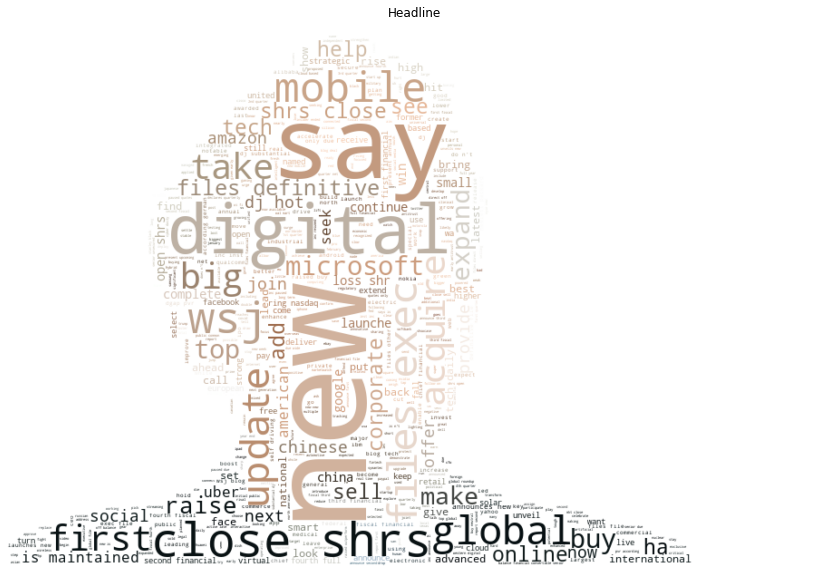

In [164]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(headline_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Headline')
plt.axis("off")
plt.show()

In [165]:
abstract_tokens_wc = wc.generate(abstract_tokens)

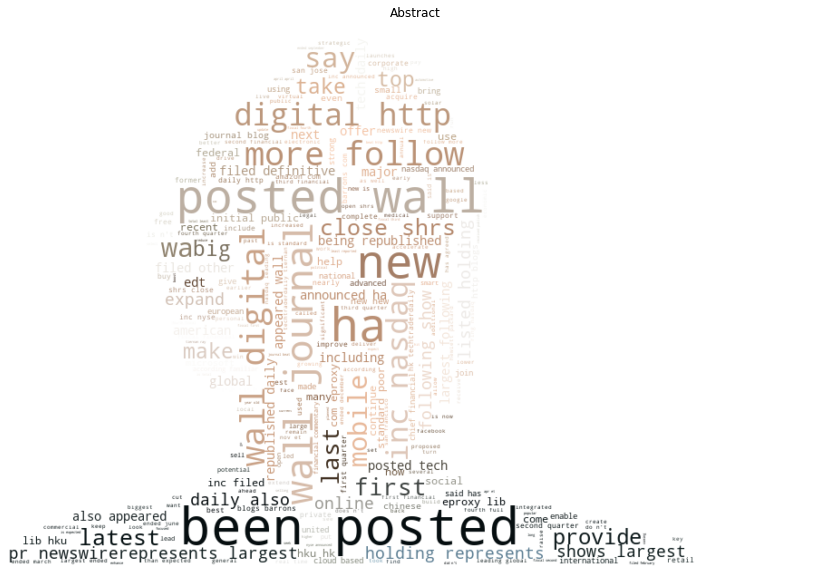

In [166]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(abstract_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Abstract')
plt.axis("off")
plt.show()

### Word Clouds for each sentiments in headline and abstract

In [169]:
headline_tokens_wc = wc.generate(headline_tokens_neu)

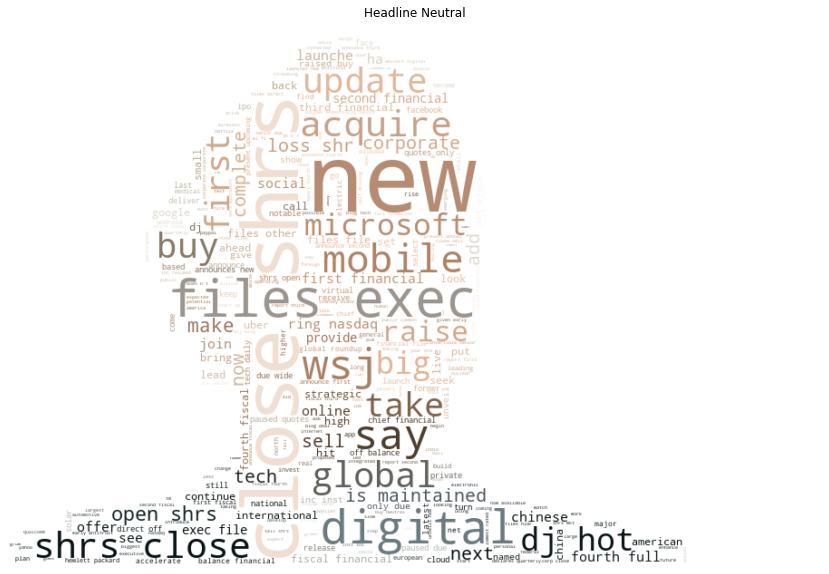

In [170]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(headline_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Headline Neutral')
plt.axis("off")
plt.show()

In [171]:
headline_tokens_wc = wc.generate(headline_tokens_pos)

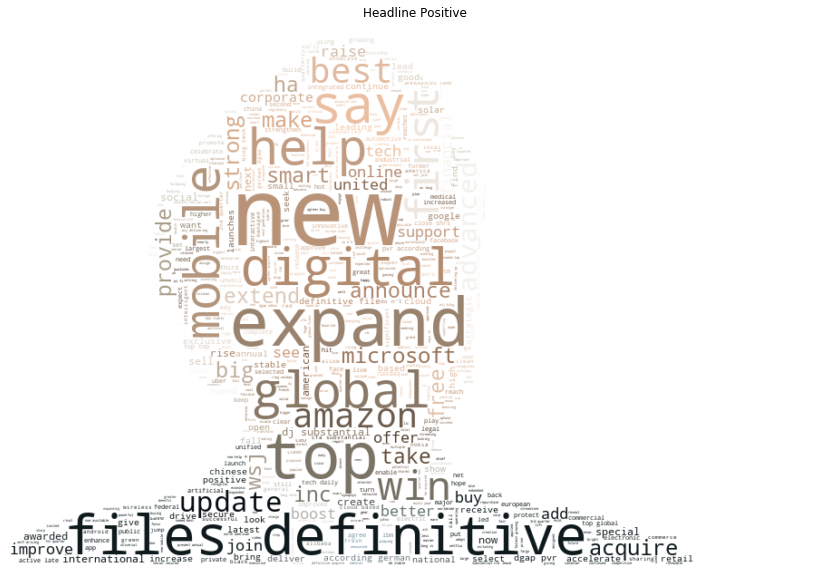

In [172]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(headline_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Headline Positive')
plt.axis("off")
plt.show()

In [173]:
headline_tokens_wc = wc.generate(headline_tokens_neg)

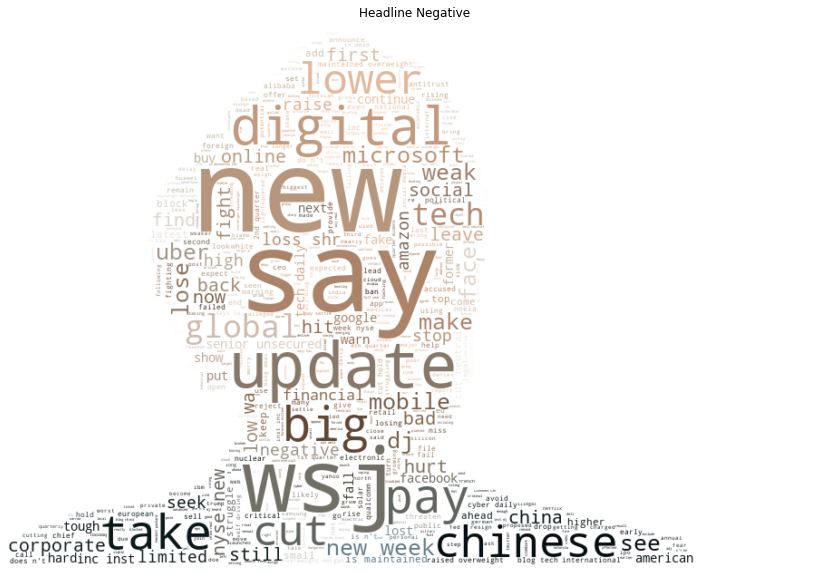

In [174]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(headline_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Headline Negative')
plt.axis("off")
plt.show()

In [175]:
abstract_tokens_wc = wc.generate(abstract_tokens_neu)

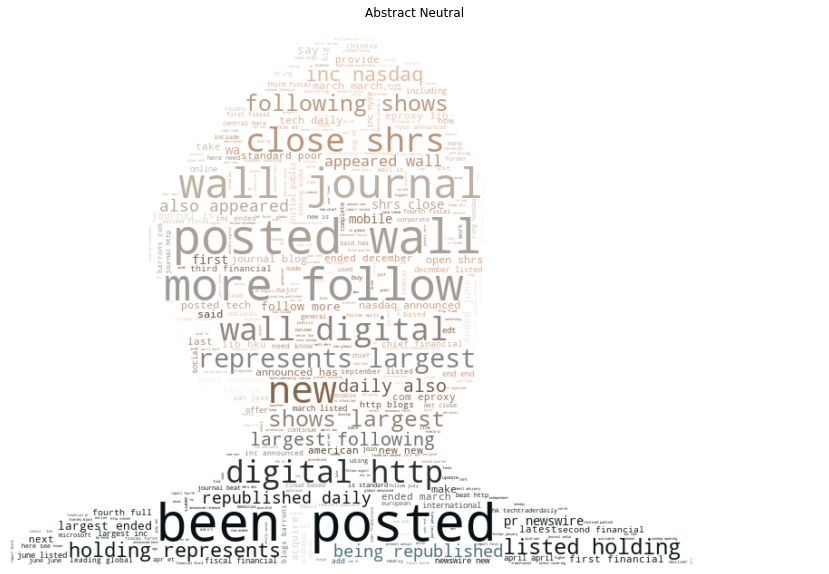

In [176]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(abstract_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Abstract Neutral')
plt.axis("off")
plt.show()

In [177]:
abstract_tokens_wc = wc.generate(abstract_tokens_pos)

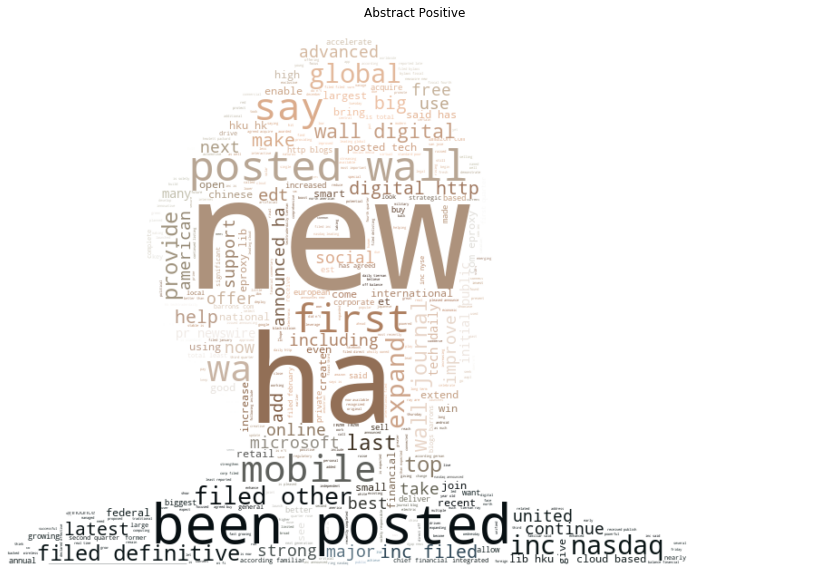

In [178]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(abstract_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Abstract Positive')
plt.axis("off")
plt.show()

In [179]:
abstract_tokens_wc = wc.generate(abstract_tokens_neg)

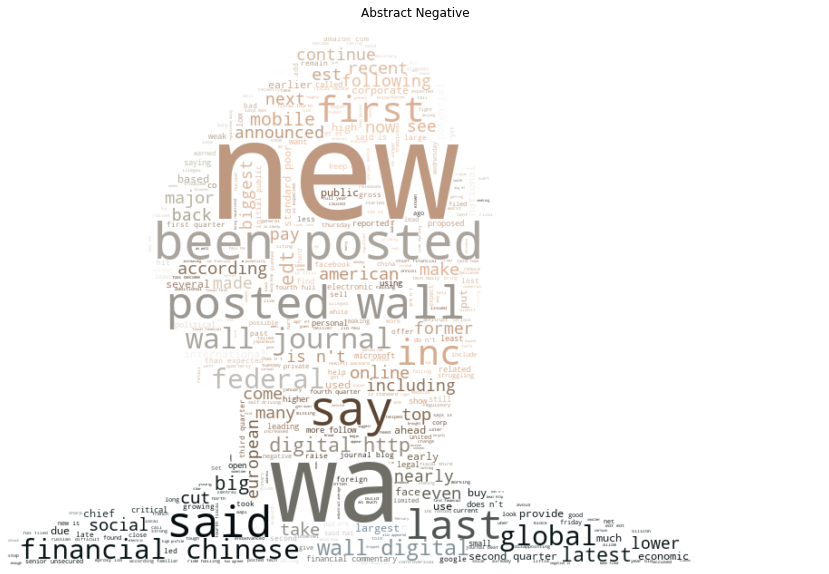

In [180]:
image_colors = ImageColorGenerator(warren_buffett)
plt.figure(figsize=[20,10])
plt.imshow(abstract_tokens_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Abstract Negative')
plt.axis("off")
plt.show()